In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')

#### [실습] 기본그래프 그리기

1. df_tsb 데이터에서 '2022-06-01'~'2022-06-30' 날짜 사이의 이용객수를 합계하여 선그래프로 출력 (x축 : 날짜, y축 이용객수합계)
2. df_tsb 데이터에서 호선별로 승차 이용객수의 평균을 막대그래프로 출력
3. df_subway 데이터에서 승차총승객수와 하차총승객수에 대한 산점도 그래프를 그리고 노선명별로 색상을 다르게 표현

In [4]:
df_tsb = pd.read_csv('data/서울교통공사_역별일별승하차인원정보_20220731.csv')
df_tsb.head()

,날짜,호선,역번호,역명,구분,이용객수
0,2022-01-01,1,150,서울역,승차,18525
1,2022-01-01,1,150,서울역,하차,17087
2,2022-01-01,1,151,시청,승차,5660
3,2022-01-01,1,151,시청,하차,5063
4,2022-01-01,1,152,종각,승차,10046


In [5]:
df_sub = df_tsb[(df_tsb['날짜'] >= '2022-06-01') & (df_tsb['날짜'] <= '2022-06-30')]
df_grp = df_sub.groupby('날짜', as_index=False)['이용객수'].sum()

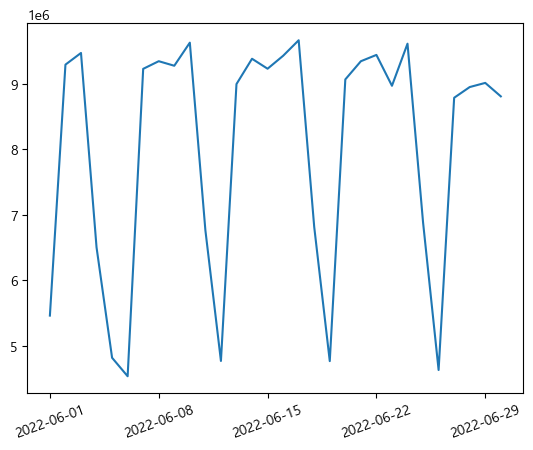

In [6]:
x = df_grp['날짜']
y = df_grp['이용객수']
xtick = [xt for xt in range(len(x)) if xt % 7 == 0]
labels = [x[xt] for xt in xtick]
plt.plot(x, y)
plt.xticks(xtick, labels,rotation=20)
plt.show()

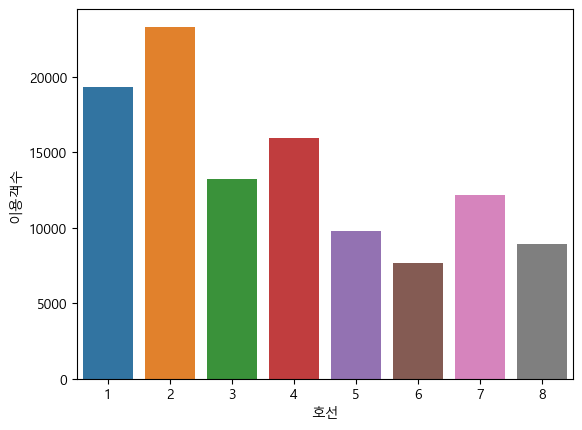

In [7]:
df_sub = df_tsb[df_tsb['구분'] == '승차']
df_grp = df_sub.groupby('호선', as_index=False)['이용객수'].mean()
sns.barplot(data = df_grp, x = '호선', y='이용객수')
plt.show()

In [36]:
df_subway = pd.read_csv('./data/CARD_SUBWAY_MONTH_202107.csv', encoding='CP949')
df_subway.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20210701,중앙선,상봉(시외버스터미널),6102,6098,20210704
1,20210701,중앙선,망우,7706,7633,20210704
2,20210701,중앙선,양원,1987,2052,20210704
3,20210701,중앙선,구리,13576,13748,20210704
4,20210701,중앙선,도농,10145,9146,20210704


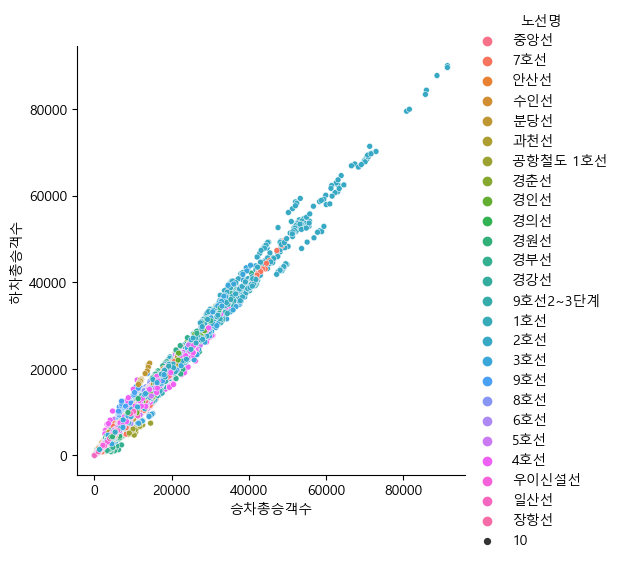

In [39]:
sns.relplot(kind='scatter', data=df_subway, x='승차총승객수', y='하차총승객수', size=10,hue='노선명')
plt.show()

<br>

#### [실습] 한 수치형 변수에 대한 요약과 시각화

2. df_sp에서 'math score'의 히스토그램을 matplotlib으로 그려기

3. df_sp에서 'math score'의 히스토그램을 seaborn으로 그려기



In [40]:
df_sp = pd.read_csv('./data/StudentsPerformance.csv')
df_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


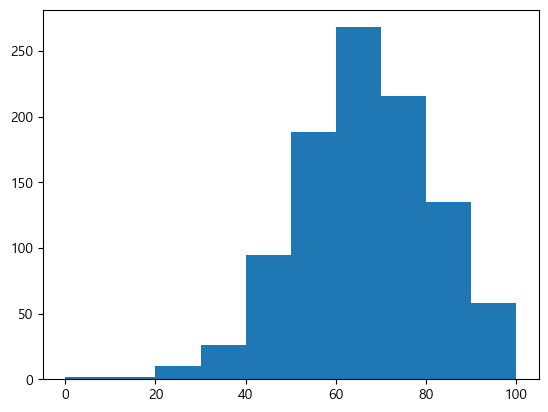

In [41]:
plt.hist(df_sp['math score'])
plt.show()

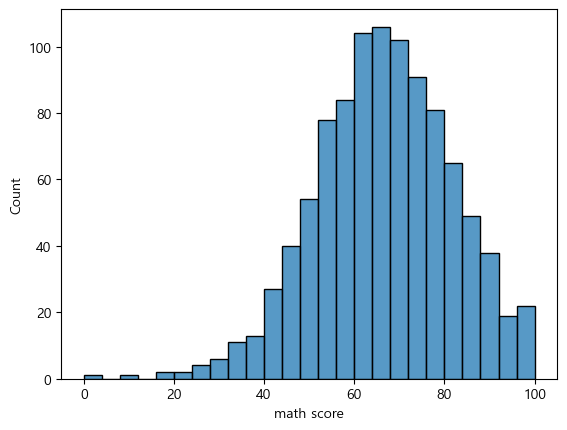

In [42]:
sns.histplot(data=df_sp,
             x='math score')
plt.show()

#### [실습] 두 범주형 변수의 관계 탐색

1. df_sp에서 'race/ethnicity'와 'parental level of education'의 교차표 만들고 히트맵으로 출력 
2. 1.의 교차표를 인덱스에 대한 백분율로 바꿔서 히트맵 출력
5. df_sp에서 'race/ethnicity'와 'parental level of education'에대한 'math score'의 평균을 나타내는 피벗테이블 생성후 히트맵으로 출력 

In [43]:
df_sp = pd.read_csv('./data/StudentsPerformance.csv')
df_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<AxesSubplot: xlabel='parental level of education', ylabel='race/ethnicity'>

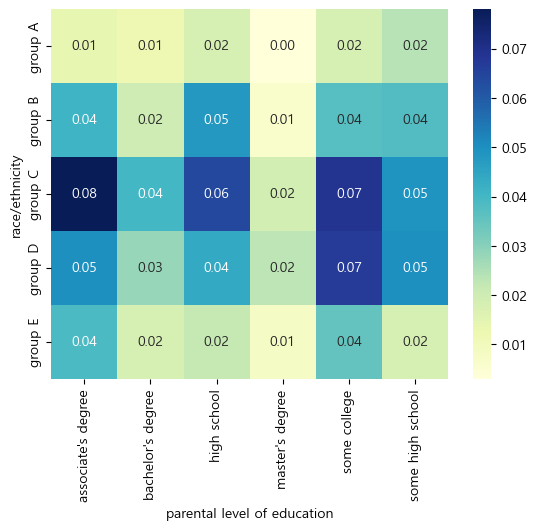

In [44]:
ctab = pd.crosstab(df_sp['race/ethnicity'], df_sp['parental level of education'], normalize='all')
sns.heatmap(ctab, cmap='YlGnBu', annot=True, fmt='.2f')


<AxesSubplot: xlabel='parental level of education', ylabel='race/ethnicity'>

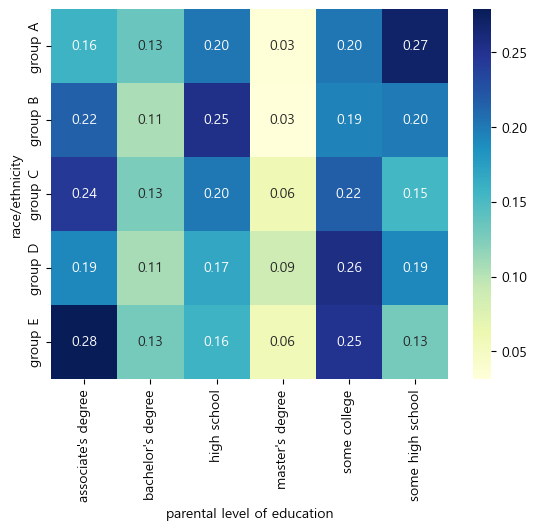

In [45]:
ctab = pd.crosstab(df_sp['race/ethnicity'], df_sp['parental level of education'], normalize='index')
sns.heatmap(ctab, cmap='YlGnBu', annot=True, fmt='.2f')

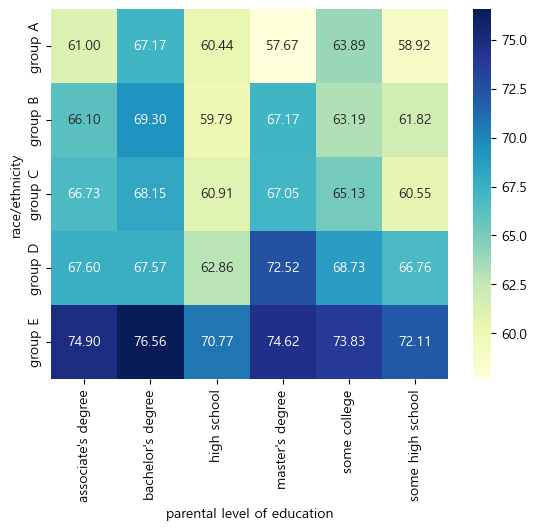

In [46]:
import numpy as np
pivot = pd.pivot_table(df_sp, index='race/ethnicity', columns='parental level of education', values='math score', aggfunc=np.mean)
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.2f')
plt.show()

<br>


#### [실습]

1. df_sp에서 'reading score'의 Q1(25%), 중위수(median, 50%), Q3(75%) 계산하기
2. df_sp에서 'math score'와 'reading score'의 상자그림을 하나의 표안에 그리기 (matplotlib)
2. df_sp에서 'race/ethnicity'별 'math score'의 상자그림 하나의 표안에 그리기 (seaborn)



In [47]:
df_sp = pd.read_csv('./data/StudentsPerformance.csv')
df_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [48]:
q1 = df_sp['reading score'].quantile(0.25)
median = df_sp['reading score'].quantile(0.50)
q3 = df_sp['reading score'].quantile(0.75)
print(q1, median, q3)

59.0 70.0 79.0


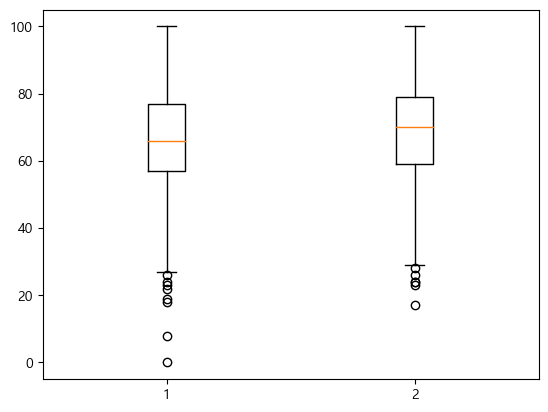

In [49]:
plt.boxplot(df_sp[['math score','reading score']])
plt.show()

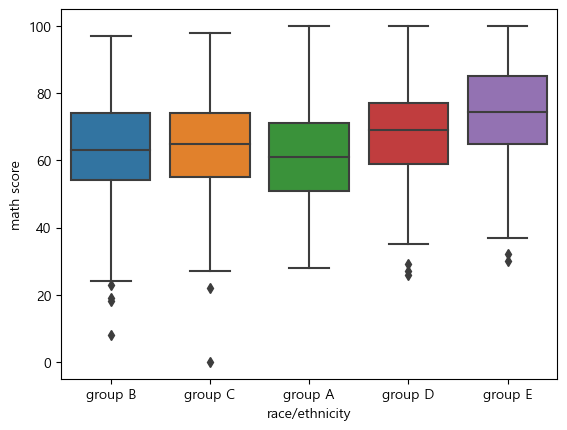

In [50]:
sns.boxplot(data=df_sp,
            x='race/ethnicity', 
            y='math score')
plt.show()

<br>


#### [실습]

1. df_tsb에서 '호선'별 '이용객수'의 상자그림을 '구분'으로 나누어 하나의 표안에 그리기
2.'날짜'로부터 연-월 만 표기되는 '연월'컬럼을 만들고 '이용객수'를 1000단위의 표현으로 바꾸기(소수여도 됨)
3. 2.번의 '연월' 과 '호선'별 '이용객수'를 나타내는 피벗테이블을 만들고 히트맵으로 출력 (소수점 둘째자리까지)


In [54]:
df_tsb = pd.read_csv('data/서울교통공사_역별일별승하차인원정보_20220731.csv')
df_tsb.head()

,날짜,호선,역번호,역명,구분,이용객수
0,2022-01-01,1,150,서울역,승차,18525
1,2022-01-01,1,150,서울역,하차,17087
2,2022-01-01,1,151,시청,승차,5660
3,2022-01-01,1,151,시청,하차,5063
4,2022-01-01,1,152,종각,승차,10046


<AxesSubplot: xlabel='호선', ylabel='이용객수'>

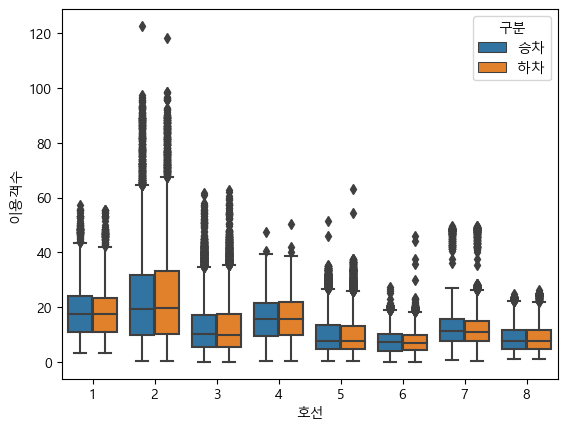

In [53]:
sns.boxplot(data=df_tsb,
            x='호선', 
            y='이용객수',
            hue='구분')

<AxesSubplot: xlabel='연월', ylabel='호선'>

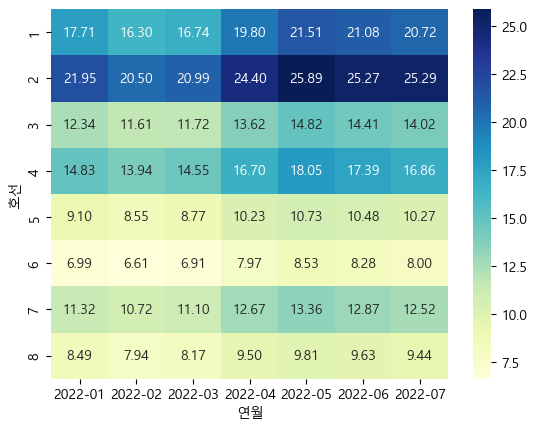

In [52]:
df_tsb['연월'] = df_tsb['날짜'].astype('datetime64').apply(lambda x: x.strftime('%Y-%m'))
df_tsb['이용객수'] = df_tsb['이용객수'] / 1000
pivot = pd.pivot_table(df_tsb, values = '이용객수', index='호선', columns='연월', aggfunc='mean')
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.2f')